In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Скачиваем данные по олимпийским играм и регионам.
olimpic = pd.read_csv('C:/Users/79653/Desktop/ввад/olimpic.csv')
region = pd.read_csv('C:/Users/79653/Desktop/ввад/region.csv')
# Сливаем две таблицы в одну (по общем столбцу).
reg_plus_olimp = pd.merge(olimpic, region, on = 'NOC')
reg_plus_olimp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [3]:
# Ищем количество золотых медалей для зимней, летней и суммарно
summer = reg_plus_olimp[reg_plus_olimp.Season == 'Summer']
sum_gold_sum = summer.Medal[summer.Medal == 'Gold'].count()
winter = reg_plus_olimp[reg_plus_olimp.Season == 'Winter']
win_gold_sum = winter.Medal[winter.Medal == 'Gold'].count()
df = pd.DataFrame({'season': ['Summer','Winter','all'], 'gold_medals': 
                   [sum_gold_sum,win_gold_sum,sum_gold_sum+win_gold_sum]})
df

,season,gold_medals
0,Summer,11458
1,Winter,1913
2,all,13371


Видим, что в летней олимпиаде больше золотых медалистов, нежели в зимней

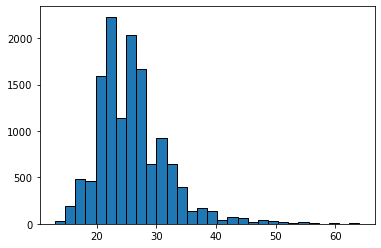

In [4]:
# Строим гистограмму зависимости распределения золотых медалистов от их возраста
seasons_gold = reg_plus_olimp[reg_plus_olimp.Medal == 'Gold']
plt.hist(seasons_gold.Age, bins = 30, edgecolor = 'black');

Большинство золотых медалистов - в возрасте от 20 до 30 лет, очень мало золотых медалистов старше 50 лет

Олимпийских чемпионов страше 60 лет (включая 60) было: 10


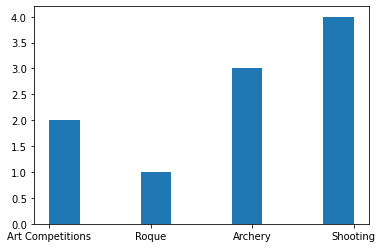

In [5]:
# Посчитаем, сколько олимпийских чемпионов было страше 60 лет (включая 60)
# Построим гистограмму по видам спорта для золотых медалистов старше 60
print('Олимпийских чемпионов страше 60 лет (включая 60) было:', (seasons_gold.Age >= 60).sum())
plt.hist(seasons_gold[seasons_gold.Age >= 60].Sport);

Очень мало золотых медалистов старше 60 лет, в основном они участвуют в соревнованиях по не особо подвижным видам спорта

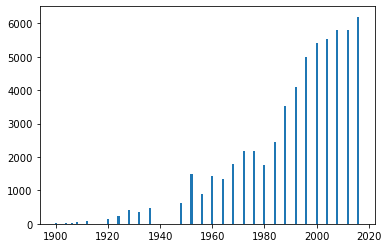

In [6]:
# Строим гистограмму количества женщин по годам, участвовавших в летних олимпиадах
data = summer[summer.Sex == 'F'].groupby('Year',as_index = False)['Sex'].count()
plt.bar(data.Year, data.Sex);

С каждым годом женщин, участвующих в олимпиаде, становится больше, заметный рост начинается с 1950 годов, возможно, это связано с пересмотром некоторых принципов и стереотипов со временем

In [7]:
# Создадим отдельную таблицу для зимних олимпийских игр с 1956 с 1988 год, в которой изменим:
# 'Gold' на 3 , 'Silver' на 2, 'Bronze' на 1
winter1 = winter[winter.Year >= 1956]
winter_years = winter1[winter1.Year <= 1988]
medals = winter_years.Medal.map({'Gold': 3 , 'Silver': 2, 'Bronze': 1})
winter_years_med = winter_years.copy()
winter_years_med.Medal = medals
winter_years_med.Medal.unique()

array([nan,  1.,  2.,  3.])

In [8]:
# Делаем список 6 команд, набравщих суммарно больше всех баллов в медальном зачете
larg_gold_win = winter_years_med.groupby('Team',as_index = False)['Medal'].sum().nlargest(6,columns = 'Medal')
larg_gold_win

,Team,Medal
97,Soviet Union,927.0
111,United States,312.0
37,Finland,268.0
104,Sweden,262.0
79,Norway,232.0
31,East Germany,196.0


В СССР больше всех побед (медалей), причем количество баллов почти в 3 раза больше, чем у США

In [9]:
# Ищем, в каком году, в каком городе было получено больше всего очков странами из предыдущего списка
# Сортируем по количеству набранных очков
teams = larg_gold_win.Team
win_teams = winter_years_med[winter_years_med.Team.isin(teams)].groupby(['Team','Year','City'],as_index = False).sum()
win_teams_max_med = win_teams.groupby('Team',as_index = False).apply(
    lambda x: x.nlargest(1,columns = 'Medal'))[['Team','Year','City','Medal']]
win_teams_max_med.sort_values(by = 'Medal', ascending = False)

,,Team,Year,City,Medal
3,32,Soviet Union,1988,Calgary,130.0
5,48,United States,1980,Lake Placid,82.0
1,14,Finland,1988,Calgary,70.0
4,35,Sweden,1964,Innsbruck,61.0
2,18,Norway,1968,Grenoble,53.0
0,3,East Germany,1980,Lake Placid,52.0


Видим, что самые лучшие результаты у всех стран были до 1988 года, то есть, либо ужесточились правила олимпийских игр, из-за чего получить медали стало труднее, либо подготовка спортсменов стала хуже